# Machine Learning - Principal Component Analysis

### Our project is to compress facial images using PCA and decompress eigenfaces back to restore original images. We are using a dataset of 1000 images with 64 x 64 = 4096 pixels 

In [22]:
# importing required packages
import numpy as np
import matplotlib.pylab as pylab 
from sklearn.datasets import load_digits 
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
import matplotlib.pyplot as plt
import os

In [23]:
cwd = os.getcwd()
# defining the constants
numOfImages = 1000
width = 64
height = 64

# retrieving images from directory.
imagesName = np.array([x[2] for x in os.walk(os.path.join(cwd, "images"))])[0]
faces = np.zeros((1000, 64, 64))

for index in range(numOfImages):
    faces[index] = plt.imread(os.path.join(cwd, "images", imagesName[index]))

In [24]:
faces.shape

(1000, 64, 64)

In [25]:
# Reshaping the data into 2-D (400,4096)
faces = faces.reshape(1000,4096)

(1000, 4096)


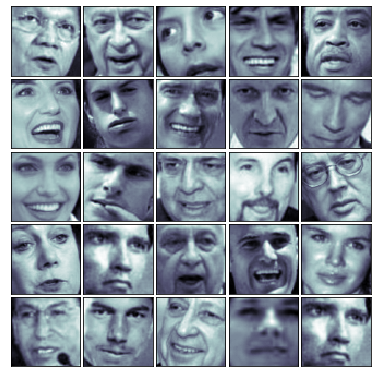

In [26]:
print(faces.shape) # there are 1000 faces each of them is of 64x64=4096 pixels
fig = plt.figure(figsize=(5,5)) 
fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05) 
# plot 25 random faces
j = 1
np.random.seed(0)
for i in np.random.choice(range(faces.shape[0]), 25): 
    ax = fig.add_subplot(5, 5, j, xticks=[], yticks=[]) 
    ax.imshow(np.reshape(faces[i,:],(64,64)), cmap=plt.cm.bone, interpolation='nearest') 
    j += 1
plt.show()

In [42]:
covarinace_matrix = Pipeline.named_steps['pca'].get_covariance()
covarinace_matrix.shape

TypeError: 'property' object is not subscriptable

In [28]:
n_comp =1000
# Feature Scaling
pipeline = Pipeline([('scaling', StandardScaler()), ('pca', PCA(n_components=n_comp))])
# Implementing PCA
faces_proj = pipeline.fit_transform(faces)
print(faces_proj.shape)

(1000, 1000)


In [29]:
mean_face = np.reshape(pipeline.named_steps['scaling'].mean_, (64,64))
sd_face = np.reshape(np.sqrt(pipeline.named_steps['scaling'].var_), (64,64))

In [30]:
pipeline.named_steps['pca'].explained_variance_ratio_.shape

(1000,)

In [31]:
pipeline.named_steps['pca'].explained_variance_ratio_

array([3.08461391e-01, 1.23336086e-01, 5.36683041e-02, 3.95853122e-02,
       3.16620996e-02, 2.16714885e-02, 2.03425916e-02, 1.85635316e-02,
       1.83107228e-02, 1.44728515e-02, 1.38647308e-02, 1.27892034e-02,
       1.09951327e-02, 1.00143397e-02, 8.82886267e-03, 7.72604268e-03,
       7.56866986e-03, 7.44766019e-03, 6.89234005e-03, 6.57058523e-03,
       6.06929481e-03, 5.68812121e-03, 5.58922828e-03, 5.43020981e-03,
       5.28461125e-03, 5.10464017e-03, 4.74800171e-03, 4.54118352e-03,
       4.47979529e-03, 4.22386849e-03, 4.10881906e-03, 3.94440847e-03,
       3.74838238e-03, 3.70629907e-03, 3.48897346e-03, 3.43920655e-03,
       3.31795201e-03, 3.25446170e-03, 3.12993482e-03, 3.04189022e-03,
       2.96045104e-03, 2.85132153e-03, 2.67999521e-03, 2.66575743e-03,
       2.62415258e-03, 2.52860123e-03, 2.45521860e-03, 2.37768394e-03,
       2.33616320e-03, 2.24323282e-03, 2.14910874e-03, 2.10978519e-03,
       2.08858293e-03, 2.00065964e-03, 1.98705532e-03, 1.96477535e-03,
      

In [32]:
pipeline.named_steps['pca'].components_

array([[-0.00551517, -0.00633476, -0.00707069, ..., -0.00578768,
        -0.00555105, -0.00491489],
       [ 0.01609843,  0.01678746,  0.01747709, ..., -0.01268668,
        -0.01209392, -0.01126451],
       [ 0.02113896,  0.02145601,  0.02234092, ...,  0.02750865,
         0.02766861,  0.02795563],
       ...,
       [-0.00988814,  0.01339699,  0.02666836, ..., -0.00465517,
        -0.00424183,  0.04117833],
       [-0.00147323,  0.0087283 , -0.01750874, ...,  0.00249418,
         0.00441624,  0.00076031],
       [ 0.00707756,  0.00603176, -0.00559017, ..., -0.00972442,
         0.00442893,  0.00921853]])

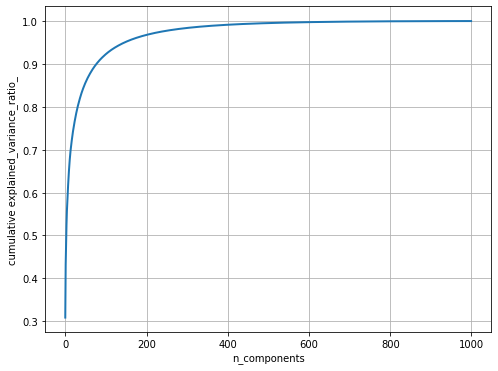

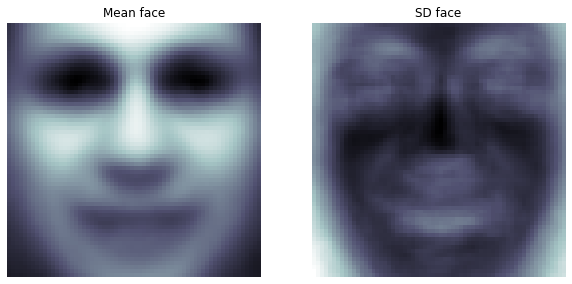

In [33]:
pylab.figure(figsize=(8, 6))
pylab.plot(np.cumsum(pipeline.named_steps['pca'].explained_variance_ratio_), linewidth=2)
pylab.grid(), pylab.axis('tight'), pylab.xlabel('n_components'), pylab.ylabel('cumulative explained_variance_ratio_')
pylab.show()
pylab.figure(figsize=(10,5))
pylab.subplot(121), pylab.imshow(mean_face, cmap=pylab.cm.bone), pylab.axis('off'), pylab.title('Mean face')
pylab.subplot(122), pylab.imshow(sd_face, cmap=pylab.cm.bone), pylab.axis('off'), pylab.title('SD face')
pylab.show()

### Plotting Eigen Faces

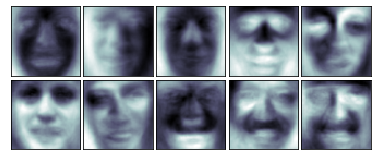

In [34]:
fig = plt.figure(figsize=(5,2)) 
fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05) 
# plot the first 10 eigenfaces
for i in range(10): 
    ax = fig.add_subplot(2, 5, i+1, xticks=[], yticks=[]) 
    ax.imshow(np.reshape(pipeline.named_steps['pca'].components_[i,:], (64,64)), cmap=plt.cm.bone,
              interpolation='nearest')

### Reconstructing Images

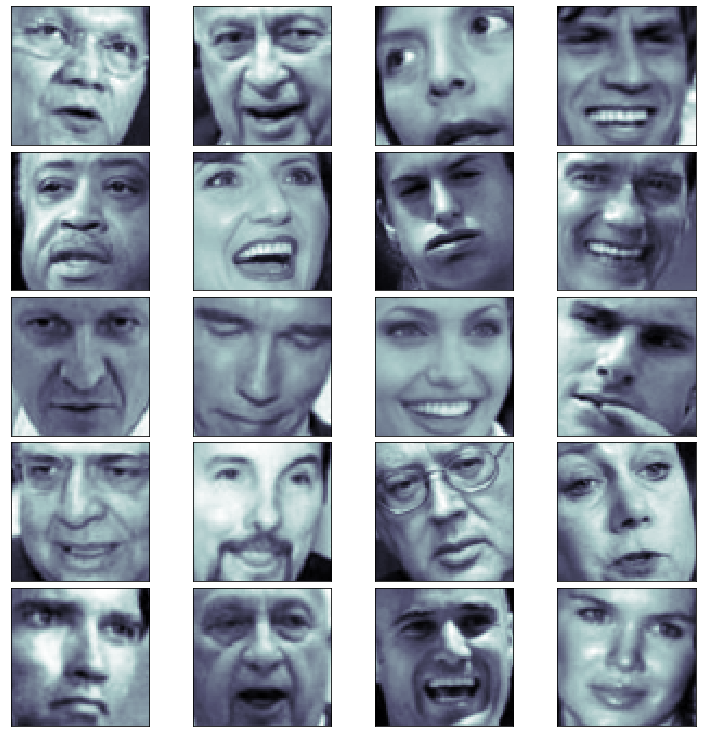

In [35]:
# face reconstruction
faces_inv_proj = pipeline.named_steps['pca'].inverse_transform(faces_proj) 
#reshaping as 400 images of 64x64 dimension 
fig = plt.figure(figsize=(10,10)) 
fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05) 
# plot the faces, each image is 64 by 64 dimension but 8x8 pixels 
j = 1
np.random.seed(0)
for i in np.random.choice(range(faces.shape[0]), 20): 
    ax = fig.add_subplot(5, 4, j, xticks=[], yticks=[]) 
    ax.imshow(mean_face + sd_face*np.reshape(faces_inv_proj,(1000,64,64)) [i,:], cmap=plt.cm.bone, interpolation='nearest')
    j += 1

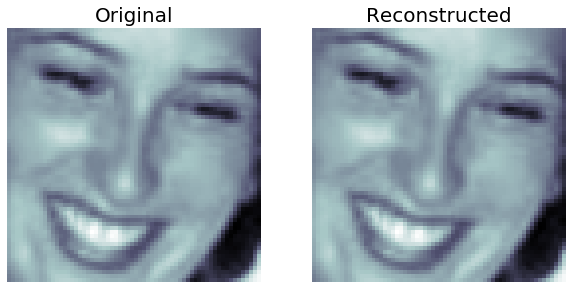

In [36]:
orig_face = np.reshape(faces[21,:], (64,64))
reconst_face = np.reshape(faces_proj[21,:]@pipeline.named_steps['pca'].components_, (64,64))
reconst_face = mean_face + sd_face*reconst_face
plt.figure(figsize=(10,5))
plt.subplot(121), plt.imshow(orig_face, cmap=plt.cm.bone, interpolation='nearest'), plt.axis('off'), plt.title('Original', size=20)
plt.subplot(122), plt.imshow(reconst_face, cmap=plt.cm.bone, interpolation='nearest'), plt.axis('off'), plt.title('Reconstructed', size=20)
plt.show()

### Computing Eigen Values Manually (Without Sci-Kit)

In [37]:
# converting the image matris to 4096 
imagesUpdated = np.zeros((numOfImages, 4096))
for i in range(numOfImages):
    imagesUpdated[i] = faces[i].ravel()
faces = imagesUpdated.T

In [38]:
# calculating mean of the images matric.
imagesMean = (faces.mean(axis=1)).reshape(-1,1)
# normalising images
normalisedImages = faces - imagesMean

In [39]:
# calculating eigen values and eigen vectors
covarianceMatrix = (normalisedImages).dot(normalisedImages.T)
eigenValues, eigenVectors = np.linalg.eig(covarianceMatrix)

In [40]:
# sorting the eigenvalues and eigenvectors in descending order
idx = np.argsort(-eigenValues) 
eigenValues = eigenValues[idx]
eigenVectors = eigenVectors[:,idx]

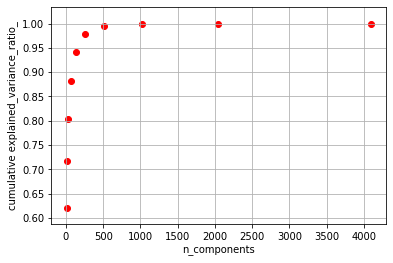

For k = 8	 -------> 	62% of variance is covered.
For k = 16	 -------> 	71% of variance is covered.
For k = 32	 -------> 	80% of variance is covered.
For k = 64	 -------> 	88% of variance is covered.
For k = 128	 -------> 	94% of variance is covered.
For k = 256	 -------> 	97% of variance is covered.
For k = 512	 -------> 	99% of variance is covered.
For k = 1024	 -------> 	100% of variance is covered.
For k = 2048	 -------> 	100% of variance is covered.
For k = 4096	 -------> 	100% of variance is covered.


In [41]:
kValues = [8,16, 32, 64, 128, 256,512, 1024, 2048, 4096 ]
varianceCovered = np.zeros(10)

i = 0
for k in kValues:
    totalVariance = eigenValues.sum()
    coveredVariance = eigenValues[:k].sum()
    temp = (coveredVariance / totalVariance).real
    varianceCovered[i] = temp.real
    i += 1
    

# drawing the graph that indicates the covered variance
plt.scatter(kValues, varianceCovered, color='red')
pylab.grid(), pylab.axis('tight'), pylab.xlabel('n_components'), pylab.ylabel('cumulative explained_variance_ratio_')
plt.show()

# printing out the covered variance
varianceCovered = (varianceCovered * 100).astype(int)
for i in range(10):
    print("For k = " + str(kValues[i]) + "\t -------> \t" + str(varianceCovered[i]) + "% of variance is covered.")